In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_excel(r"C:\Users\anshi\Downloads\Sales Data.xlsx")
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
data.shape

(9994, 21)

#### Add Columns

In [3]:
data["Price"]=data["Sales"]/data["Quantity"]
data["Year"]=data["Order Date"].dt.year

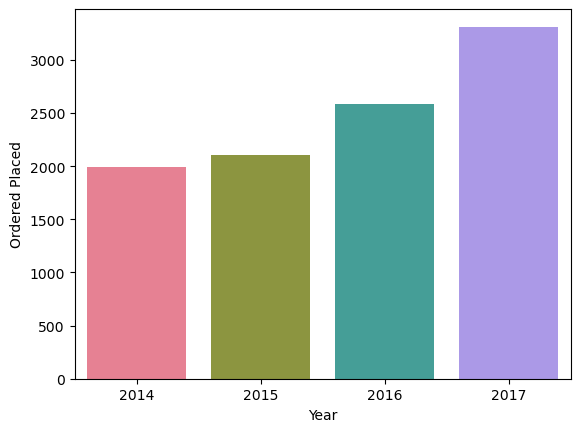

In [4]:
year=data["Year"].value_counts()
sns.barplot(x=year.index,y=year,palette="husl")

plt.ylabel("Ordered Placed")    
plt.show()

In [10]:
sales=data.groupby(["Year"],as_index=False)["Sales"].sum() 
sales


,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [11]:
profit=data.groupby(["Year"],as_index=False)["Profit"].sum()
profit

,Year,Profit
0,2014,49543.9741
1,2015,61618.6037
2,2016,81795.1743
3,2017,93439.2696


In [7]:
dataset = data[data["Year"]==2017]
dataset.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price,Year
12,13,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,5.184,2017


In [8]:
print(" Total Sales Amount : ",round(data["Sales"].sum()))
print("Total Profit Amount : ",round(data["Profit"].sum()))

 Total Sales Amount :  2297201
Total Profit Amount :  286397


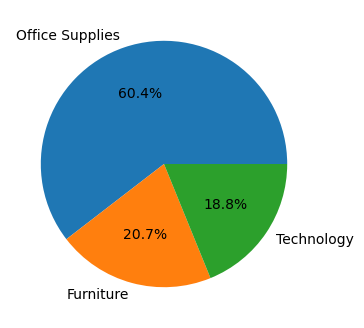

In [9]:
plt.figure(figsize=(4,4))

count_cat=dataset["Category"].value_counts()
plt.pie(x=count_cat,labels=count_cat.index,autopct='%0.1f%%')
plt.show()

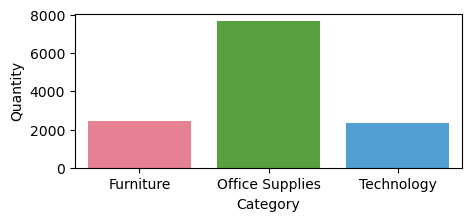

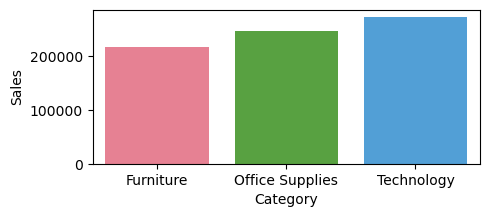

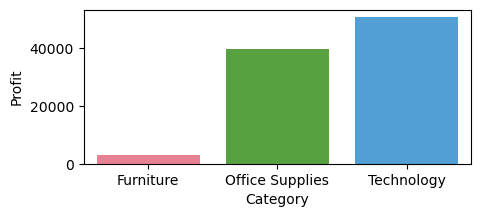

In [16]:
plt.figure(figsize=(5,2))

category_quan=dataset.groupby(["Category"],as_index=False)["Quantity"].sum()
sns.barplot(x="Category",y="Quantity",data=category_quan,palette="husl")
plt.show()

plt.figure(figsize=(5,2))
cat_sales=dataset.groupby(["Category"],as_index=False)["Sales"].sum()
sns.barplot(x="Category",y="Sales",data=cat_sales,palette="husl")
plt.show()

plt.figure(figsize=(5,2))
cat_profit=dataset.groupby(["Category"],as_index=False)["Profit"].sum()
sns.barplot(x="Category",y="Profit",data=cat_profit,palette="husl")
plt.show()



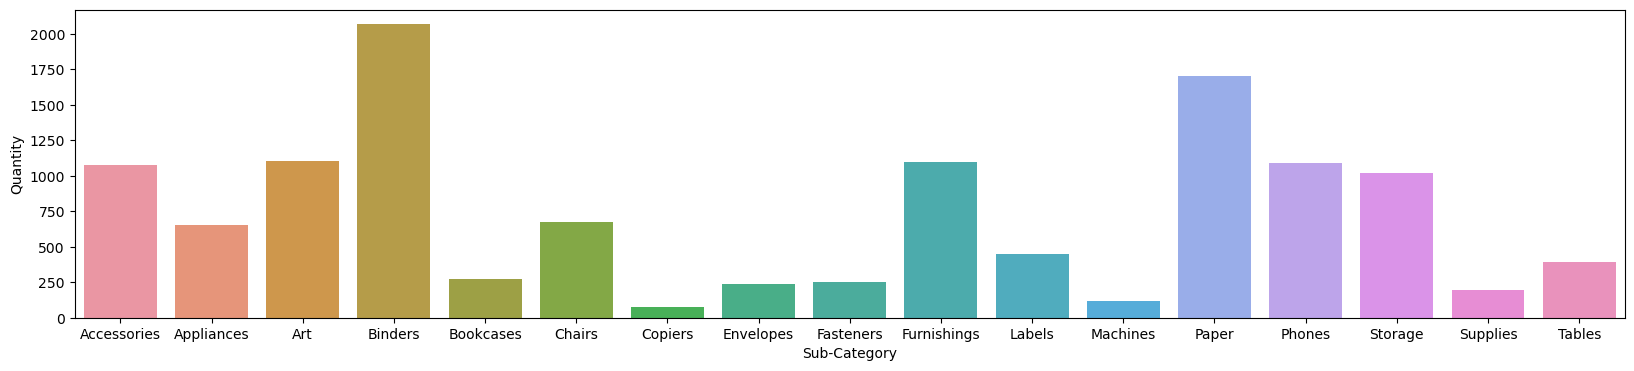

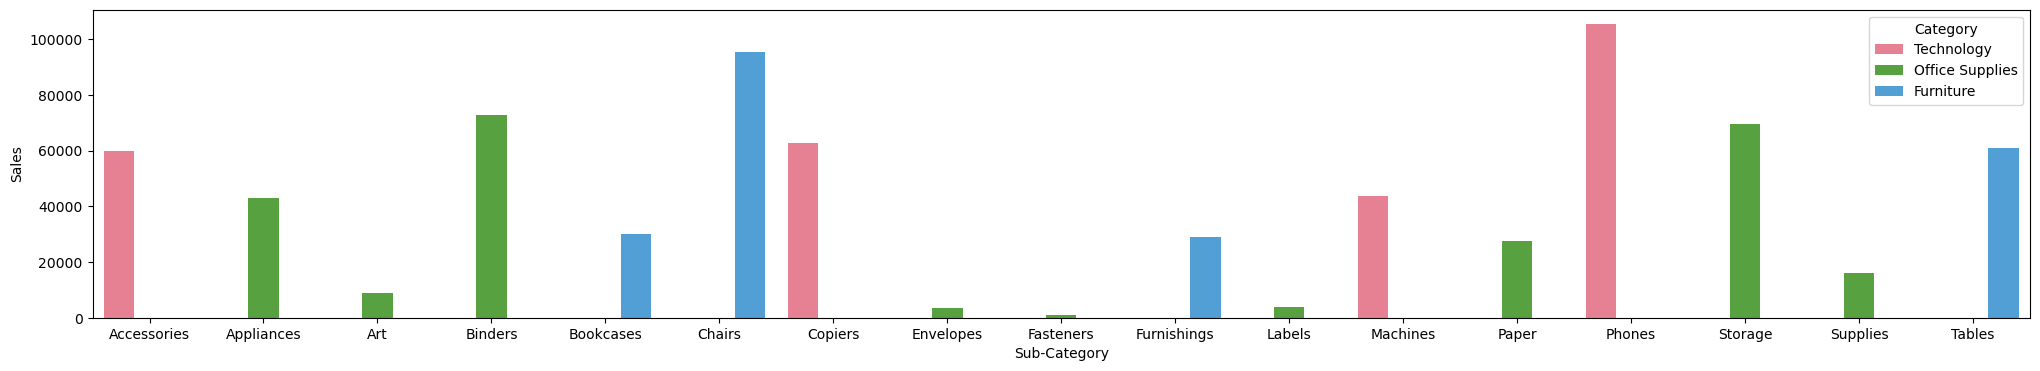

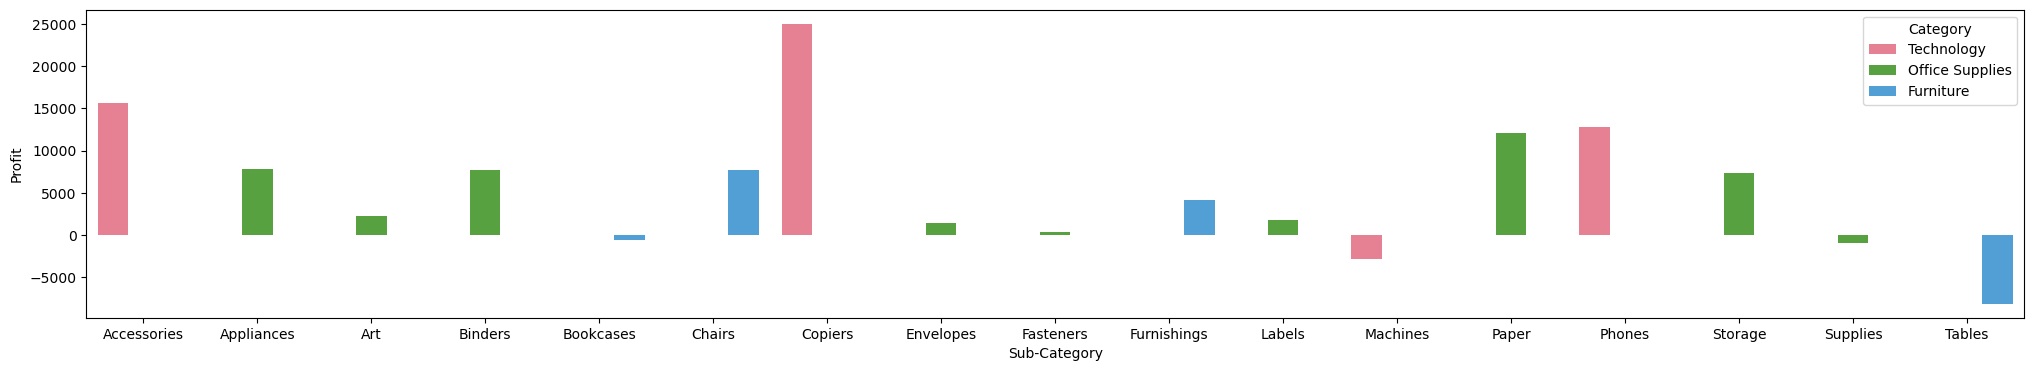

In [17]:
plt.figure(figsize=(20,4))
subcat_quan=dataset.groupby(["Sub-Category"],as_index=False)["Quantity"].sum()
sns.barplot(x="Sub-Category",y="Quantity",data=subcat_quan)
plt.show()

plt.figure(figsize=(25,4))
sub_category=dataset.groupby(["Sub-Category","Category"],as_index=False)["Sales"].sum()
sns.barplot(x="Sub-Category",y="Sales",data=sub_category,hue="Category",palette="husl")
plt.show()

plt.figure(figsize=(25,4))
sub_category=dataset.groupby(["Sub-Category","Category"],as_index=False)["Profit"].sum()
sns.barplot(x="Sub-Category",y="Profit",data=sub_category,hue="Category",palette="husl")
plt.show()

##### Increase the Price of Funitures Specially Bookcases , Tables, Supplies and Machines
##### Highest profit from copiers and phones
##### Improve the Quality of Fasteners, Lables , copiers
##### Losses occurs from Bookcases , Tables and Suppliesses , Tables and Supplies

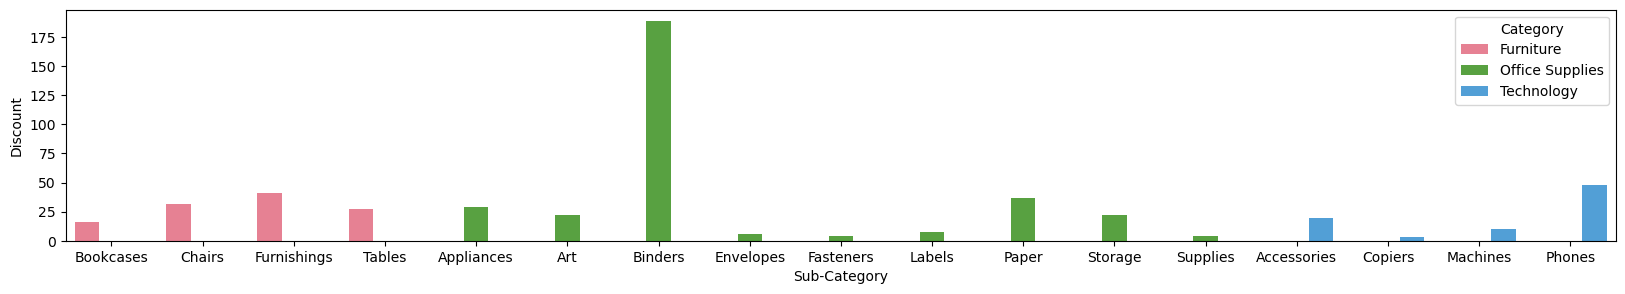

In [12]:
plt.figure(figsize=(20,3))
discount=dataset.groupby(["Category","Sub-Category"],as_index=False)["Discount"].sum()
sns.barplot(x="Sub-Category",y="Discount",data=discount,hue="Category",palette="husl")
plt.show()

##### high discount gives on binders
##### increase the discount on copiers

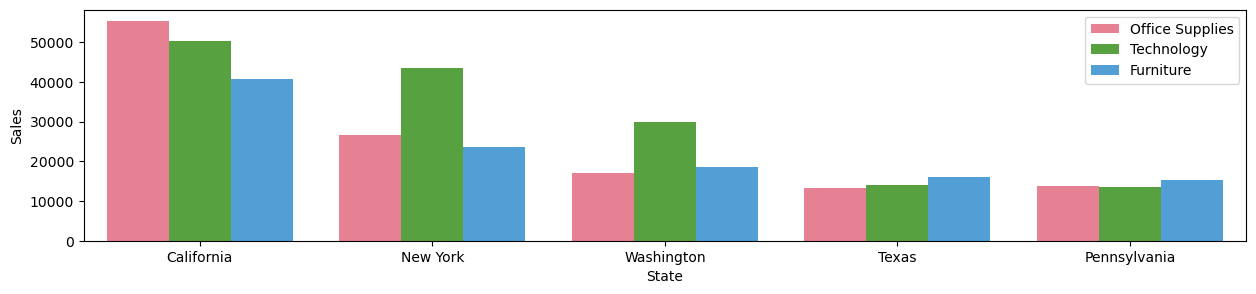

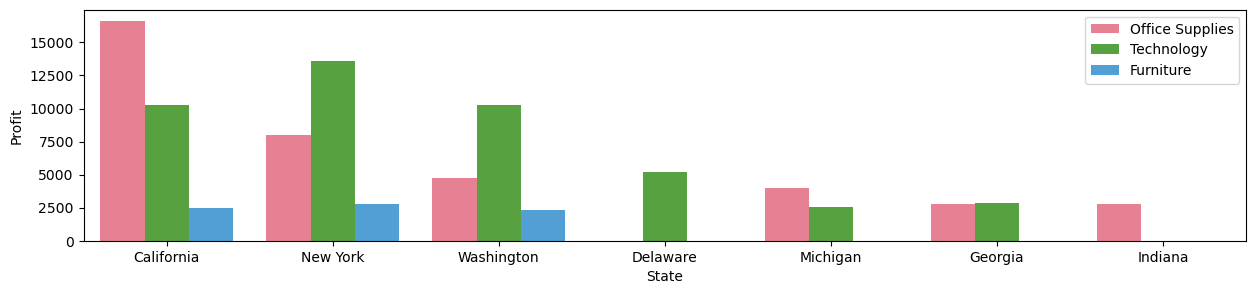

In [11]:
plt.figure(figsize=(15,3))
cat_state=dataset.groupby(["Category","State"],as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False).head(15)
sns.barplot(x="State",y="Sales",data=cat_state,hue="Category",palette="husl")
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(15,3))
cat_state=dataset.groupby(["Category","State"],as_index=False)["Profit"].sum().sort_values(by="Profit",ascending=False).head(15)
sns.barplot(x="State",y="Profit",data=cat_state,hue="Category",palette="husl")
plt.legend(loc=1)
plt.show()

##### High Sales and Profit in  California, NewYork and Washington State

In [11]:
plt.figure(figsize=(15,3))
cat_state=dataset.groupby(["Category","City"],as_index=False)["Sales"].sum().sort_values(by="Sales",ascending=False)
sns.barplot(x="City",y="Sales",data=cat_state,hue="Category",palette="husl")
plt.legend(loc=1)
plt.show()

plt.figure(figsize=(18,3))
cat_state=dataset.groupby(["Category","City"],as_index=False)["Profit"].sum().sort_values(by="Profit",ascending=False).head(20)
sns.barplot(x="City",y="Profit",data=cat_state,hue="Category",palette="husl")
plt.legend(loc=1)
plt.show()

TypeError: DataFrame.nlargest() missing 1 required positional argument: 'columns'

<Figure size 1500x300 with 0 Axes>

##### High Sales and Profit in New York ,Los angeles and Seattle City

## Region

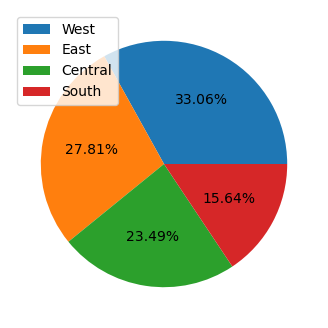

In [14]:
plt.figure(figsize=(4,4))
region = dataset['Region'].value_counts()
plt.pie(region,autopct="%0.2f%%" )
plt.legend(region.index,loc=2)
plt.show()


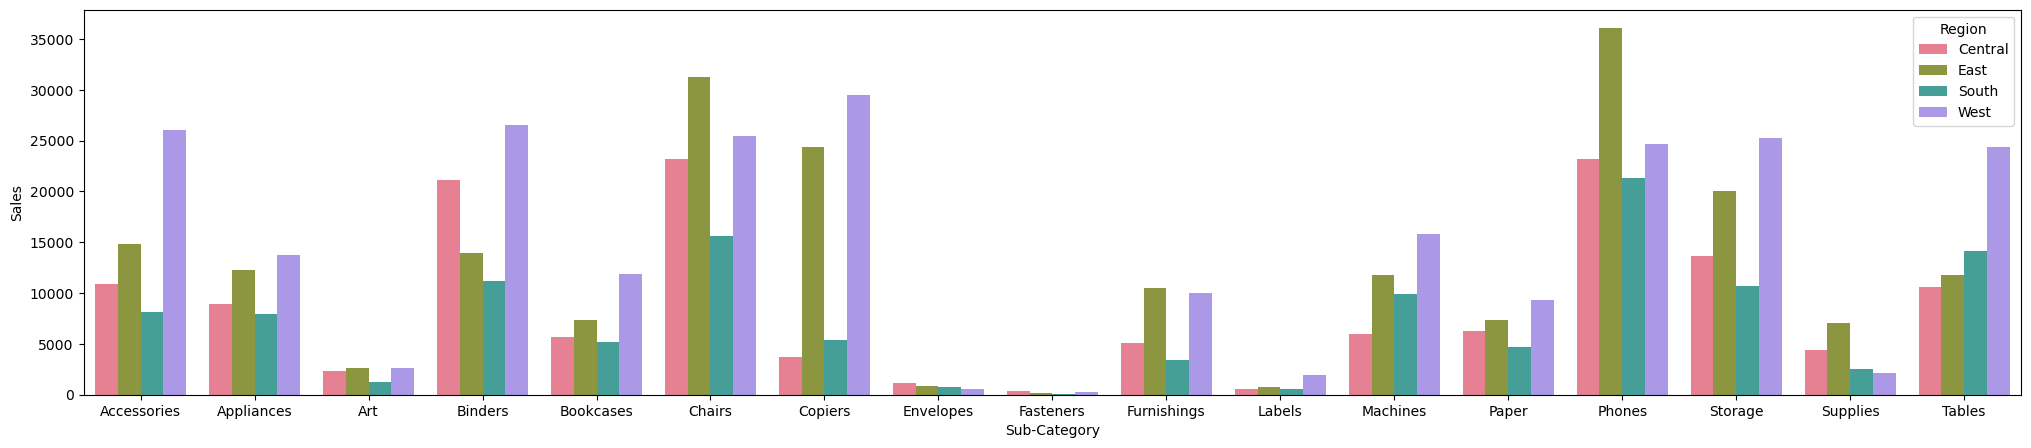

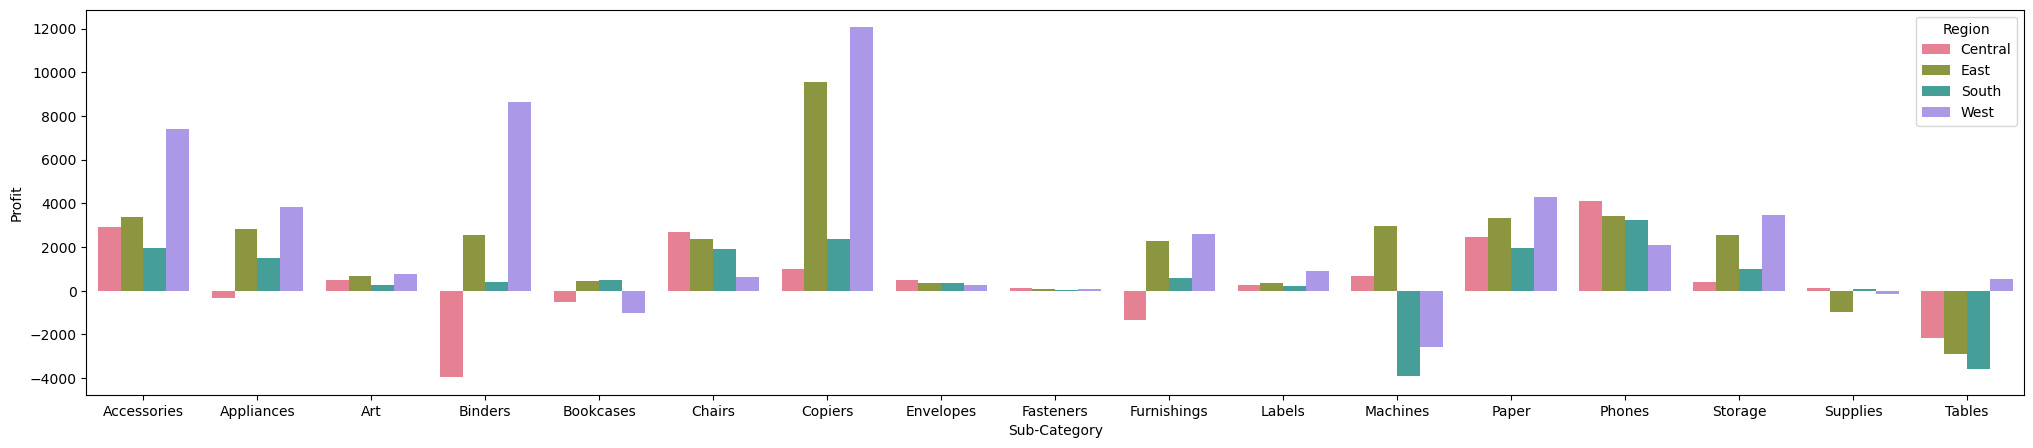

In [17]:
plt.figure(figsize=(25,5))

sub_category=dataset.groupby(["Sub-Category","Region"],as_index=False)["Sales"].sum()
sns.barplot(x="Sub-Category",y="Sales",data=sub_category,hue="Region",palette="husl")
plt.show()

plt.figure(figsize=(25,5))
sub_category=dataset.groupby(["Sub-Category","Region"],as_index=False)["Profit"].sum()
sns.barplot(x="Sub-Category",y="Profit",data=sub_category,hue="Region",palette="husl")
plt.show()

##### Top Sales in East and West Region 
##### Occur Losses in Central-->Appliences ,binder,bookcases,furnishing, machines,supplies,tables
##### Occur Losses in East-->bookcases,furnishing,supplies,tables
##### Occur Losses in West-->bookcases
##### Occur Losses in South-->bookcases,tables

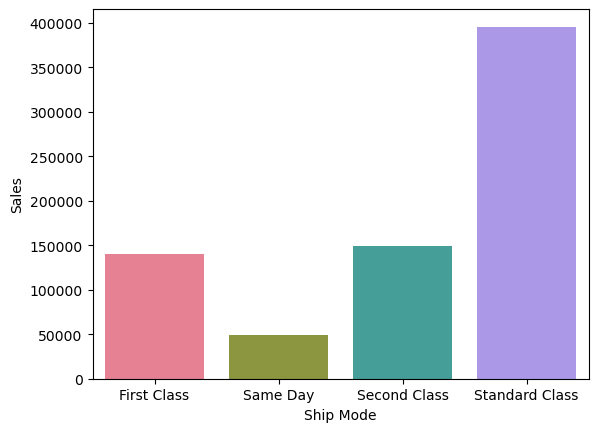

In [26]:
ship_sale=dataset.groupby(["Ship Mode"],as_index=False)["Sales"].sum()
sns.barplot(x="Ship Mode",y="Sales",data=ship_sale,palette="husl")
plt.show()

##### Top Sales by Standard Class and Second Class

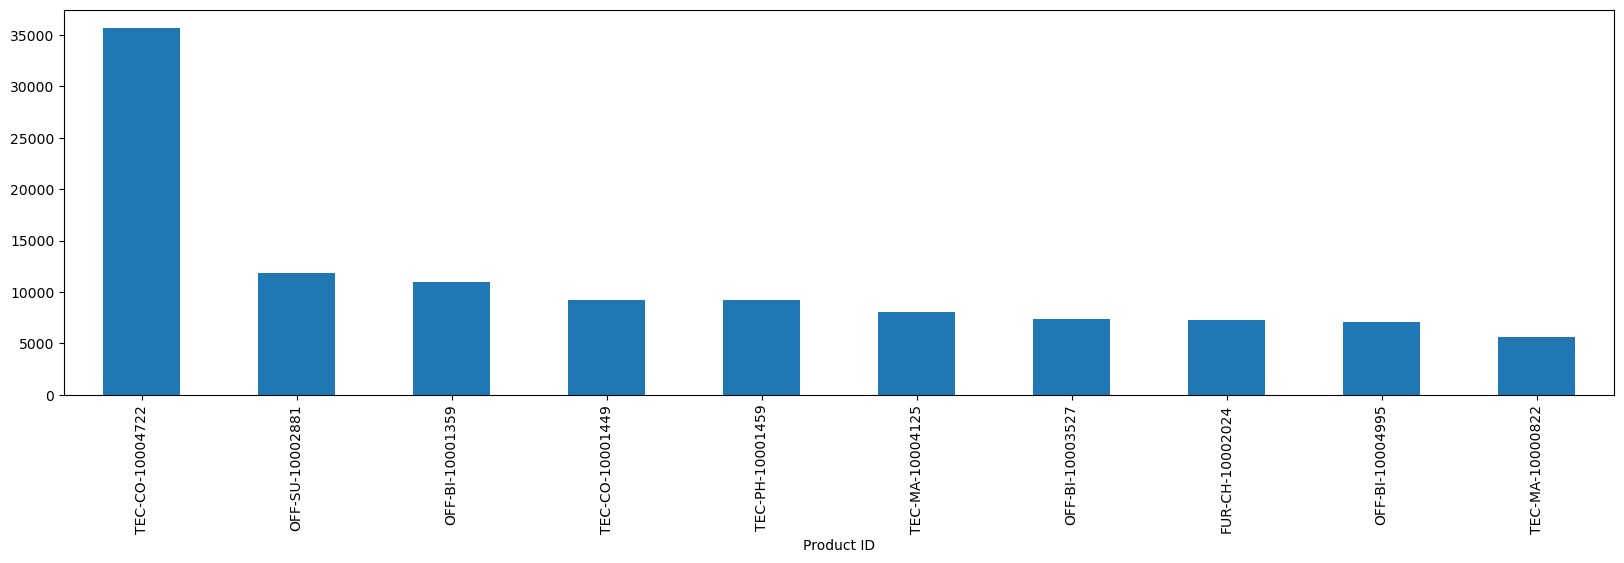

In [21]:
#sub_category=dataset.groupby(["Sub-Category"],as_index=False)["Profit"].sum()
plt.figure(figsize=(20,5))
dataset.groupby("Product ID")["Sales"].sum().nlargest(10).plot(kind='bar')
plt.show()


In [24]:
dataset["Product Name"].value_counts().nlargest(10)

Product Name
Easy-staple paper                                  16
Staples                                            15
Staples in misc. colors                            12
Staple envelope                                    11
Storex Dura Pro Binders                             8
Global Wood Trimmed Manager's Task Chair, Khaki     8
Staple remover                                      8
Logitech Desktop MK120 Mouse and keyboard Combo     7
Adjustable Depth Letter/Legal Cart                  7
Sterilite Officeware Hinged File Box                7
Name: count, dtype: int64